# **Neural network regression with tensorflow**

In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# TO BE CHECKED
# %load_ext tensorboard

In [3]:
import tensorflow as tf

2024-07-12 17:53:44.680403: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 17:53:44.689266: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 17:53:44.699446: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 17:53:44.699461: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 17:53:44.707833: I tensorflow/core/platform/cpu_feature_gua

In [4]:
print(tf.__version__)

2.16.2


In [5]:
import numpy as np
import matplotlib.pyplot as plt

## **Generating datasets**

In [6]:
# Create features
X = np.arange(start = -7, stop = 15, step = 3, dtype = 'float32')

In [7]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)

In [8]:
# Create labels
y = np.arange(start = 3, stop = 25, step = 3, dtype = 'float32')

In [9]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)

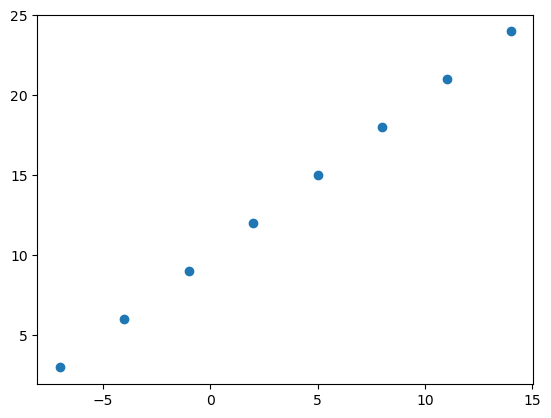

In [10]:
plt.scatter(X, y)
plt.show()

In [11]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
X = tf.constant(X)

2024-07-12 17:53:46.990413: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-12 17:53:47.022653: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-12 17:53:47.022696: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-12 17:53:47.025008: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-12 17:53:47.025035: I external/local_xla/xla/stream_executor

In [13]:
y = tf.constant(y)

## **Creating a model**

In [14]:
tf.random.set_seed(42)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [16]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [17]:
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 10.3199 - mae: 10.3199
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 10.1874 - mae: 10.1874
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.0549 - mae: 10.0549
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.9224 - mae: 9.9224
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.7899 - mae: 9.7899

I0000 00:00:1720799627.660819  410823 service.cc:145] XLA service 0x7fda90004e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720799627.660880  410823 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-12 17:53:47.668850: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-12 17:53:47.692466: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720799627.791969  410823 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.7899 - mae: 9.7899


In [18]:
y_pred = model.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [19]:
y_pred

array([[18.47138]], dtype=float32)

## **Improving the model**

#### **Inrease number of epochs**

In [20]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [21]:
model2.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [22]:
model2.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 7.9861 - mae: 7.9861
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.8536 - mae: 7.8536
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.7211 - mae: 7.7211
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.5886 - mae: 7.5886
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.4700 - mae: 7.4700
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.4644 - mae: 7.4644
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.4587 - mae: 7.4587
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4531 - mae: 7.4531
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4475 - mae: 7.4475
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.4419 - mae: 7.4419
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.4362 - mae: 7.4362
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.4306 - mae: 7.4306
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/st

In [23]:
y_pred2 = model2.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [24]:
y_pred2

array([[29.921696]], dtype=float32)

#### **Add extra hidden layer**

In [25]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [26]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [27]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 13.9161 - mae: 13.9161
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.3686 - mae: 13.3686
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.8231 - mae: 12.8231
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.2738 - mae: 12.2738
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.7173 - mae: 11.7173
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.1496 - mae: 11.1496
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.5698 - mae: 10.5698
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.9711 - mae: 9.9711
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.3463 - mae: 9.3463
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.6853 - mae: 8.6853
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.9828 - mae: 7.9828
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 7.2362 - mae: 7.2362
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [28]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [29]:
y_pred3

array([[31.30688]], dtype=float32)

#### **Some more changes**

1. Decreasing numbers of neurons in the first hidden layer

In [30]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [31]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [32]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - loss: 14.7483 - mae: 14.7483
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 14.2703 - mae: 14.2703
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 13.7978 - mae: 13.7978
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.3282 - mae: 13.3282
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.8590 - mae: 12.8590
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.3879 - mae: 12.3879
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9124 - mae: 11.9124
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.4300 - mae: 11.4300
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.9383 - mae: 10.9383
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 10.4346 - mae: 10.4346
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.9166 - mae: 9.9166
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.3814 - mae: 9.3814
Epoch 13/100
1/1 ━━━━━━━━━━━

In [33]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [34]:
y_pred3

array([[29.880783]], dtype=float32)

2. Change optimizer function to Adam with default arguments

In [35]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [36]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

In [37]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step - loss: 12.4012 - mae: 12.4012
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 12.3313 - mae: 12.3313
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.2613 - mae: 12.2613
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.1913 - mae: 12.1913
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.1212 - mae: 12.1212
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 12.0511 - mae: 12.0511
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9808 - mae: 11.9808
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.9105 - mae: 11.9105
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.8402 - mae: 11.8402
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.7697 - mae: 11.7697
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 11.6991 - mae: 11.6991
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.6285 - mae: 11.6285
Epoch 13/100
1/1 ━━━━━━━

In [38]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [39]:
y_pred

array([[18.47138]], dtype=float32)

3. Set learning rate to 0.01 for Adam optimizer

In [40]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [41]:
model3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [42]:
model3.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - loss: 14.2564 - mae: 14.2564
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 13.5868 - mae: 13.5868
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.9239 - mae: 12.9239
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.2631 - mae: 12.2631
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 11.6007 - mae: 11.6007
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 10.9335 - mae: 10.9335
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 10.2591 - mae: 10.2591
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.5750 - mae: 9.5750
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.8788 - mae: 8.8788
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 8.1681 - mae: 8.1681
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 7.4400 - mae: 7.4400
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 6.6918 - mae: 6.6918
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━

In [43]:
y_pred3 = model3.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [44]:
y_pred3

array([[27.161047]], dtype=float32)

## **Evaluating a model**

In [45]:
X2 = tf.range(-100, 100, 4)

In [46]:
X2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [47]:
y2 = X2 + 10

In [48]:
y2

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

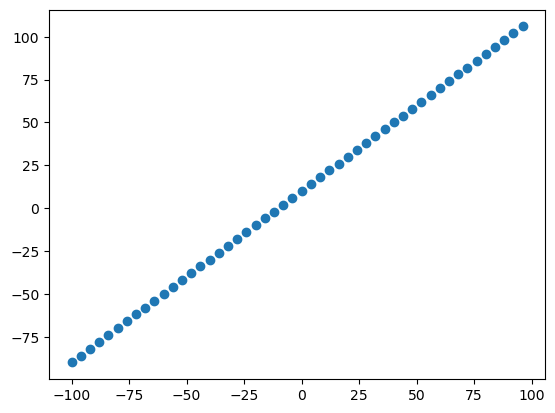

In [49]:
plt.scatter(X2, y2)
plt.show()

In [50]:
X2_train = X2[:40]

In [51]:
y2_train = y2[:40]

In [52]:
X2_test = X2[40:]

In [53]:
y2_test = y2[40:]

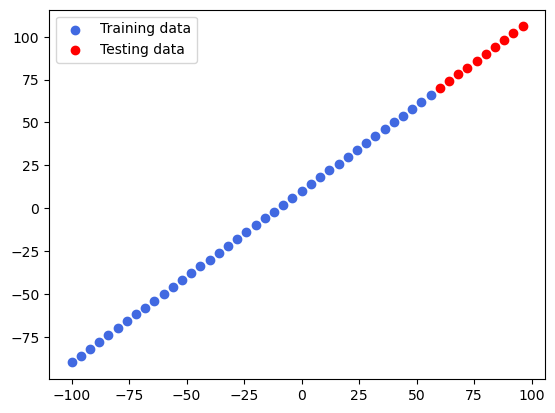

In [54]:
plt.scatter(X2_train, y2_train, c = 'royalblue', label = 'Training data')
plt.scatter(X2_test, y2_test, c = 'red', label = 'Testing data')
plt.legend()
plt.show()

In [55]:
model4 = tf.keras.models.Sequential([
    # tf.keras.layers.Dense(1, input_shape = [1])
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

In [56]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
model4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

In [58]:
model4.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 36.7649 - mae: 36.7649
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.8569 - mae: 21.8569 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.1973 - mae: 9.1973 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.5516 - mae: 12.5516 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.9243 - mae: 14.9243 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.9911 - mae: 13.9911 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.4138 - mae: 11.4138 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1710 - mae: 8.1710 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8696 - mae: 8.8696 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.4045 - mae: 10.4045 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8507 - mae: 8.8507 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.6955 - mae: 6.6955 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━

In [59]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [60]:
y2_pred = model4.predict(tf.expand_dims(X2_test, axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [61]:
y2_test, y2_pred

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>,
 array([[ 71.21257 ],
        [ 75.29852 ],
        [ 79.38447 ],
        [ 83.470406],
        [ 87.55635 ],
        [ 91.642296],
        [ 95.72823 ],
        [ 99.81418 ],
        [103.90012 ],
        [107.98608 ]], dtype=float32))

In [62]:
from tensorflow.keras.utils import plot_model

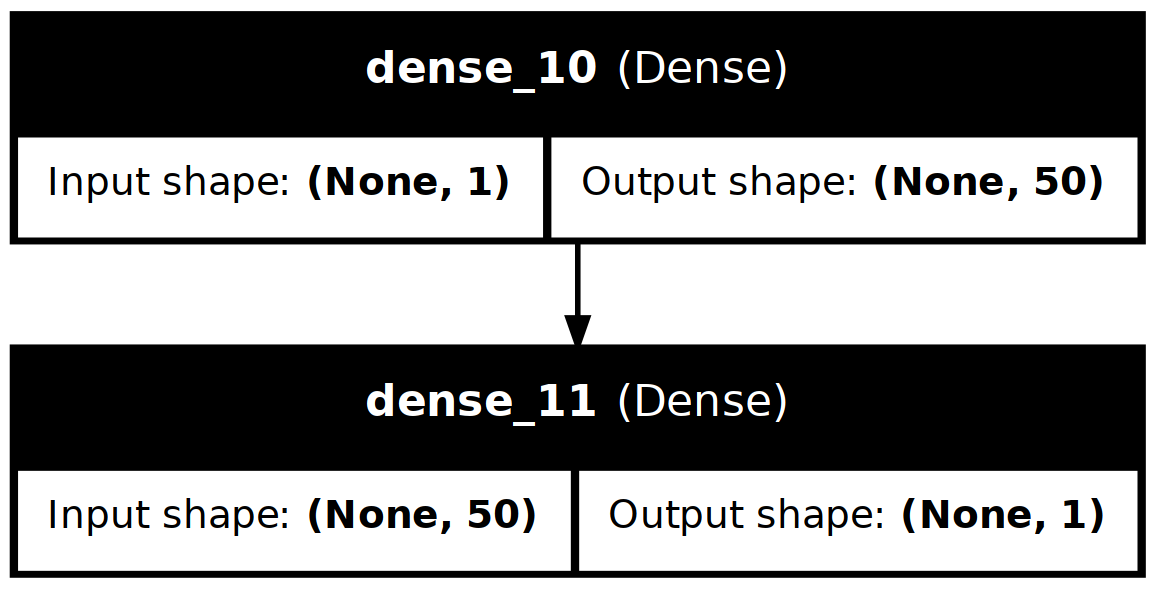

In [63]:
plot_model(model4, show_shapes = True, show_layer_names = True, expand_nested = True, rankdir = 'TB')

In [64]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
    plt.figure(figsize = (10, 6))
    plt.style.use('seaborn-v0_8')
    # Scatter the training data
    plt.scatter(x = train_data, y = train_labels, label = 'Training data')
    # Scatter the testing data
    plt.scatter(x = test_data, y = test_labels, label = 'Testing data', c = 'red')
    # Scatter the predictions
    plt.scatter(x = test_data, y = predictions, label = 'Predictions', c = 'green')
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend()
    plt.show()

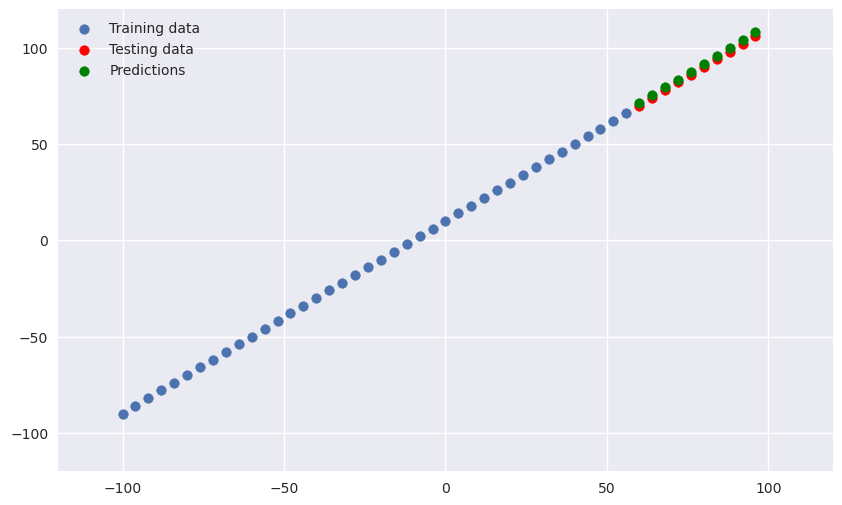

In [65]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, y2_pred)

In [66]:
model4.evaluate(X2_test, y2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 1.5993 - mae: 1.5993


[1.5993225574493408, 1.5993225574493408]

In [67]:
def get_metrics(y_true, y_pred):
    """
    Calculates and returns mae, mse and huber metrics. y_pred needs to be squeezed!
    """
    y_pred_sq = tf.squeeze(y_pred)
    mae = tf.keras.metrics.mae(y_true, y_pred_sq).numpy()
    mse = tf.keras.metrics.mse(y_true, y_pred_sq).numpy()
    huber = tf.keras.metrics.huber(y_true, y_pred_sq).numpy()
    return mae, mse, huber

def print_metrics(mae, mse, huber):
    """
    Return metrics in a formatted string
    """
    return f'MAE: {mae:.4f}; MSE: {mse:.4f}; Huber: {huber:.4f}'
    

In [68]:
mae, mse, huber = get_metrics(y2_test, tf.squeeze(y2_pred))

In [69]:
print(f'Model metrics: MAE: {mae:.4f}; MSE: {mse:.4f}; Huber: {huber:.4f}')

Model metrics: MAE: 1.5993; MSE: 2.6188; Huber: 1.0993


## **Some experiments**

#### **Model 1**

In [70]:
# tf.random.set_seed(42) - this code is for versions of tf below 2.7
tf.keras.utils.set_random_seed(42)

# Create a model
exp_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile a model
exp_1.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit the model
exp_1.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 14.7410 - mae: 14.7410 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8267 - mae: 8.8267 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.2955 - mae: 10.2955 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.0810 - mae: 12.0810 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.6305 - mae: 12.6305 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1686 - mae: 8.1686 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.7134 - mae: 8.7134 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5802 - mae: 8.5802 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.3468 - mae: 8.3468 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0923 - mae: 9.0923 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.1614 - mae: 8.1614 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.8314 - mae: 8.8314 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s

In [71]:
exp_1_pred = exp_1.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


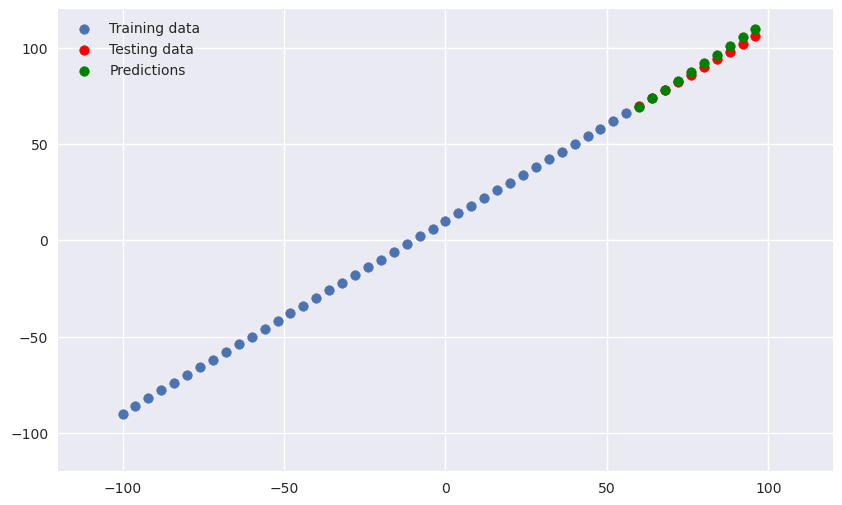

In [72]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, exp_1_pred)

In [73]:
exp_1_mae, exp_1_mse, exp_1_huber = get_metrics(y2_test, exp_1_pred)
exp_1_results = print_metrics(exp_1_mae, exp_1_mse, exp_1_huber)
exp_1_results

'MAE: 1.8126; MSE: 4.9014; Huber: 1.3723'

#### **Model 2**

In [74]:
tf.keras.utils.set_random_seed(42)

# Create a model
exp_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile a model
exp_2.compile(
    loss = tf.keras.losses.mae,
    # If I use SGD optimizer, model performs very poor!
    optimizer = tf.keras.optimizers.SGD(),
    # If I switch to a Adam optimizer, model performs excellent!
    # optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mse']
)

# Fit a model
exp_2.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 33.3860 - mse: 1557.2288
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.8476 - mse: 989.7845 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.9432 - mse: 777.9082 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.9571 - mse: 538.7654 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.9614 - mse: 437.9494 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.1237 - mse: 397.2108 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7945 - mse: 223.3665 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5240 - mse: 294.3103 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.9587 - mse: 343.1346 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.9974 - mse: 218.1443 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.9941 - mse: 308.7084 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0583 - mse: 192.3879 
Epoch 13/100

In [75]:
exp_2_pred = exp_2.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


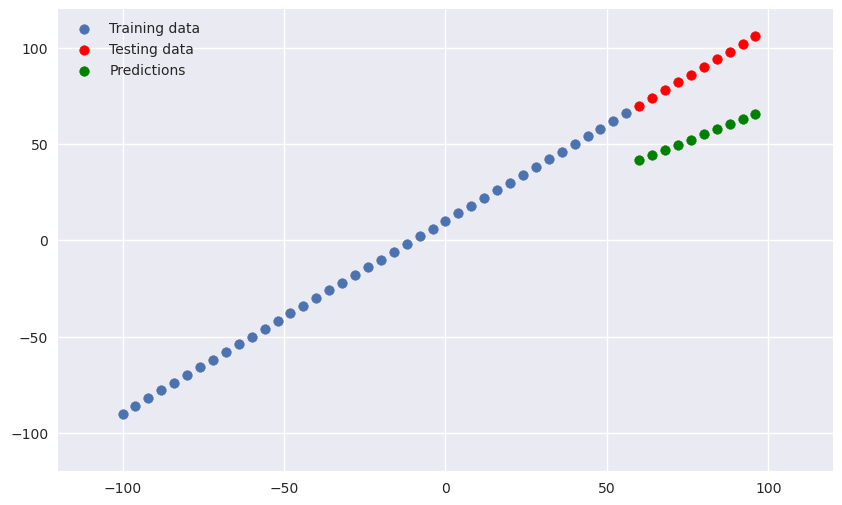

In [76]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, exp_2_pred)

In [77]:
exp_2_mae, exp_2_mse, exp_2_huber = get_metrics(y2_test, exp_2_pred)
exp_2_results = print_metrics(exp_2_mae, exp_2_mse, exp_2_huber)
exp_2_results

'MAE: 34.3595; MSE: 1195.2330; Huber: 33.8595'

#### **Model 3**

In [78]:
tf.keras.utils.set_random_seed(42)

# Create a model
exp_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    # Tried this instead of 500 epochs - gives better performance
    # tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1),
])

# Compile a model
exp_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

# Fit a model
exp_3.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 33.3860 - mae: 33.3860
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.8476 - mae: 26.8476 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.9432 - mae: 23.9432 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.9571 - mae: 19.9571 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.9614 - mae: 17.9614 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.1237 - mae: 17.1237 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.7945 - mae: 11.7945 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.5240 - mae: 14.5240 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.9587 - mae: 15.9587 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.9974 - mae: 11.9974 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.9941 - mae: 14.9941 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.0583 - mae: 11.0583 
Epoch 13/500
2/2 ━━━━━━━━

In [79]:
exp_3_pred = exp_3.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


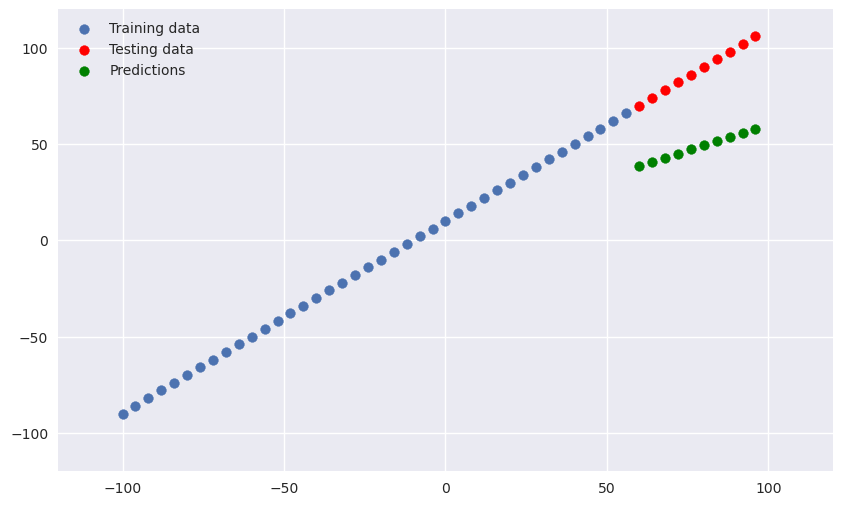

In [80]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, exp_3_pred)

In [81]:
exp_3_mae, exp_3_mse, exp_3_huber = get_metrics(y2_test, exp_3_pred)
exp_3_results = print_metrics(exp_3_mae, exp_3_mse, exp_3_huber)
exp_3_results

'MAE: 39.7558; MSE: 1608.5271; Huber: 39.2558'

#### **Model 4**

In [129]:
tf.keras.utils.set_random_seed(42)

# Create a model
exp_4 = tf.keras.models.Sequential([    
    tf.keras.layers.Dense(10),
    # Plain dense layer beats layer with relu activation
    # tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# Compile a model
exp_4.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

# Fit a model
exp_4.fit(tf.expand_dims(X2_train, axis = -1), y2_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - loss: 31.5584 - mae: 31.5584
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 25.1694 - mae: 25.1694 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 19.1168 - mae: 19.1168 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.3713 - mae: 13.3713 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.7865 - mae: 8.7865 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.8815 - mae: 8.8815 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.5866 - mae: 10.5866 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.3088 - mae: 11.3088 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.2952 - mae: 11.2952 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.7292 - mae: 10.7292 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.7484 - mae: 9.7484 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4563 - mae: 8.4563 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

In [130]:
exp_4_pred = exp_4.predict(X2_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


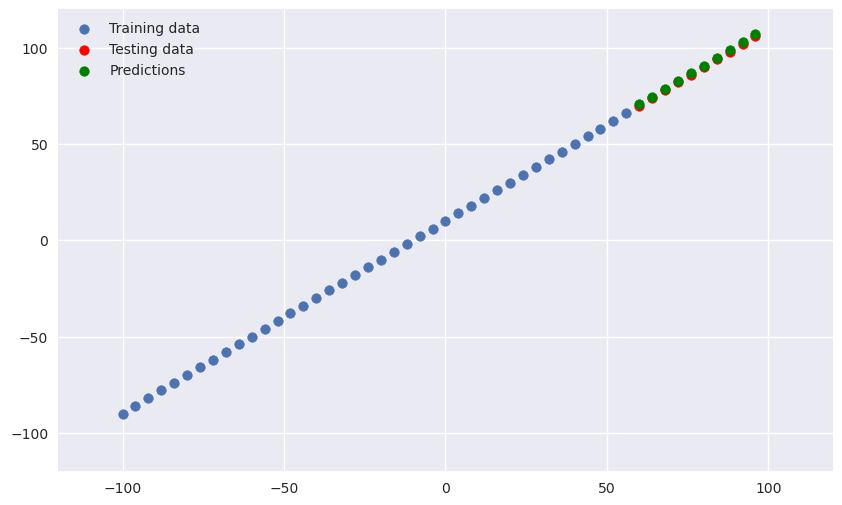

In [131]:
plot_predictions(X2_train, y2_train, X2_test, y2_test, exp_4_pred)

In [132]:
exp_4_mae, exp_4_mse, exp_4_huber = get_metrics(y2_test, exp_4_pred)
exp_4_results = print_metrics(exp_4_mae, exp_4_mse, exp_4_huber)
exp_4_results

'MAE: 0.7236; MSE: 0.5368; Huber: 0.2684'

## **Comparing the results**

In [133]:
import pandas as pd

In [134]:
modeling_results = [
    ['model 1', exp_1_mae, exp_1_mse, exp_1_huber],
    ['model 2', exp_2_mae, exp_2_mse, exp_2_huber],
    ['model 3', exp_3_mae, exp_3_mse, exp_3_huber],
    ['model 4', exp_4_mae, exp_4_mse, exp_4_huber],
]

In [135]:
comparison = pd.DataFrame(data = modeling_results, columns = ['Model name', 'MAE', 'MSE', 'Huber'])

In [136]:
comparison.set_index('Model name')

,MAE,MSE,Huber
Model name,,,
model 1,1.812563,4.901366,1.372345
model 2,34.359467,1195.233032,33.859467
model 3,39.755806,1608.527100,39.255806
model 4,0.723608,0.536801,0.268400


In [137]:
pd.DataFrame.sort_values(comparison, by = ['MAE', 'MSE', 'Huber'], inplace = True)

In [138]:
comparison

,Model name,MAE,MSE,Huber
3,model 4,0.723608,0.536801,0.268400
0,model 1,1.812563,4.901366,1.372345
1,model 2,34.359467,1195.233032,33.859467
2,model 3,39.755806,1608.527100,39.255806


In [139]:
model4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 50)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

## **Saving a model**

#### **Saving as a .keras**

In [146]:
tf.keras.models.save_model(exp_4, 'model_4-1.keras')

In [147]:
exp_4.save('model_4-2.keras')

#### **Saving as a .hdf5**

In [144]:
tf.keras.models.save_model(exp_4, 'model_4-1.h5')

In [145]:
exp_4.save('model_4-2.h5')